# Analysis of the Clustering Results

In this notebook, we are going to interpret the clusters based off the player's hierachial cluster. 

The *K-Means Cluster* is used as a means to double confirm the cluster that the player has been placed in from *Hierachial Agglomerative Clustering*. 

In [658]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [659]:
hClusterData = pd.read_csv('./Data/hierarchicalClustering.csv')
kClusterData = pd.read_csv('./Data/kmeansClustering.csv')
AllData = pd.read_csv('./Data/Cleaned/AllData.csv')
AllData = AllData.drop(["Unnamed: 0"], axis=1)
AllData = AllData.rename(columns={'Player':'PLAYER','Team':'TEAM'})

clusterDataframes = [kClusterData,hClusterData,AllData] 

clusterData = pd.DataFrame()
clusterData['PLAYER'] = hClusterData['PLAYER']
for x in clusterDataframes:
    clusterData = clusterData.merge(x,on="PLAYER",how="outer",suffixes=("","_delme"))
clusterData = clusterData[[c for c in clusterData.columns if not c.endswith('_delme')]]
#clusterData = clusterData[['PLAYER','TEAM','hCLUSTER','kCLUSTER','PC1','PC2','PC3','PC4','PC5']]

In [660]:
clusterData.head()

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
0,Stephen Curry,-1.796374,1.688838,-1.400482,-1.139984,-0.863846,GSW,2,7,33,...,1.111,0.1,0.0,0.0,0.0,0.0,0.0,0.0,11.1,0.0
1,Bradley Beal,-0.961425,1.890887,-0.959048,-2.053901,-1.001628,WAS,2,7,28,...,0.407,0.1,0.0,100.0,29.6,0.0,7.4,0.0,3.7,3.7
2,Damian Lillard,-2.044473,2.020990,-0.322098,-2.096059,0.532567,POR,2,7,30,...,1.000,0.1,0.1,100.0,16.0,0.0,4.0,0.0,12.0,16.0
3,Joel Embiid,1.454258,3.964915,-1.741855,0.934012,3.536845,PHI,1,1,27,...,0.698,3.0,2.4,82.1,32.9,0.5,3.8,0.9,7.0,12.1
4,Giannis Antetokounmpo,0.057459,2.931893,0.811177,-0.717473,0.305921,MIL,2,1,26,...,0.596,1.0,0.6,63.8,32.0,0.3,7.4,0.4,9.6,10.7


In [661]:
clusterData[clusterData['hCLUSTER']==1].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
3,Joel Embiid,1.454258,3.964915,-1.741855,0.934012,3.536845,PHI,1,1,27,...,0.698,3.0,2.4,82.1,32.9,0.5,3.8,0.9,7.0,12.1
4,Giannis Antetokounmpo,0.057459,2.931893,0.811177,-0.717473,0.305921,MIL,2,1,26,...,0.596,1.0,0.6,63.8,32.0,0.3,7.4,0.4,9.6,10.7
7,Zion Williamson,0.632637,2.009273,-0.098219,-1.240897,-0.701223,NOP,2,1,20,...,0.658,1.2,0.7,73.3,35.9,0.3,6.1,0.3,7.1,10.2
8,Kevin Durant,-0.663843,2.234169,-1.257294,-0.374588,1.630744,BKN,1,1,32,...,0.509,0.9,0.5,94.4,50.9,0.5,11.2,0.3,5.6,5.6
12,Nikola Jokic,0.650120,3.573820,-0.073705,2.973424,2.085747,DEN,1,1,26,...,0.601,2.2,1.0,81.1,40.3,1.1,11.4,0.6,6.7,6.6
16,LeBron James,-0.866422,2.366130,0.206285,0.394382,1.356265,LAL,1,1,36,...,0.438,0.7,0.2,80.0,40.3,0.4,9.1,0.4,10.2,2.8
17,Kawhi Leonard,-0.964686,2.277506,-0.292408,0.454101,1.447641,LAC,1,1,30,...,0.525,1.4,0.5,83.3,42.5,0.6,9.0,0.3,5.3,4.7
18,Karl-Anthony Towns,1.004751,2.783768,-1.441664,1.137774,1.245552,MIN,1,1,25,...,0.487,1.5,1.0,79.0,41.9,0.9,10.4,0.6,7.3,7.3
22,Julius Randle,-0.459298,2.638682,-0.523151,1.428700,0.502668,NYK,1,1,26,...,0.502,0.8,0.6,89.4,46.8,0.5,11.9,0.3,6.1,7.0
25,Nikola Vucevic,0.551852,2.277766,-1.772889,2.813408,2.341676,CHI,1,1,30,...,0.407,2.1,0.3,75.0,51.6,1.1,10.4,0.5,4.4,1.8


## Cluster 1 - Elite Scoring Players
From hCLUSTER 1, we can see that the players generally have high PC2 and a low PC3 value.  
This means that these players are offensive minded stars that are not focusing on assist and can shoot the ball well

In [662]:
clusterData[clusterData['hCLUSTER']==2].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
88,Derrick Rose,-1.233110,0.532550,0.700740,-0.286923,1.295217,NYK,6,2,32,...,0.667,0.0,0.0,100.0,50.0,0.0,16.7,0.0,0.0,16.7
127,Jalen Brunson,-0.997725,0.111372,0.392462,-0.245198,1.128338,DAL,6,2,24,...,0.714,0.0,0.0,75.0,42.9,0.0,0.0,0.0,0.0,28.6
147,Immanuel Quickley,-1.108979,-0.385465,0.156526,-0.583252,0.987599,NYK,6,2,22,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
149,Lou Williams,-1.141651,0.120539,0.595077,-0.954513,1.610352,ATL,6,2,34,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,Ty Jerome,-0.979790,-0.313963,0.146182,-0.019084,0.785541,OKC,6,2,23,...,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,Monte Morris,-1.112014,-0.333945,0.372414,0.376555,0.618136,DEN,6,2,26,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,George Hill,-0.622539,-0.484019,0.488041,0.269295,1.104954,PHI,6,2,35,...,0.000,0.0,0.0,0.0,66.7,0.0,0.0,0.0,0.0,0.0
224,Cameron Payne,-1.132937,-0.358270,0.723676,0.209466,1.639853,PHX,6,2,26,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,Gabriel Deck,0.256301,-0.003771,1.583459,-0.594520,1.586606,OKC,6,2,26,...,0.400,0.4,0.0,0.0,45.0,0.3,15.0,0.0,0.0,0.0
236,Tyrese Maxey,-0.692363,-0.677807,0.585188,-1.263084,0.982752,PHI,6,2,20,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster 2 - Assist Maker Guards that operate around the paint
From hCLUSTER 2, we can see that the players generally have a negative low PC1, PC2, PC4 value while they have a postive low PC3 and PC5 value.  
This implies that these player are not centers but are guards that operate around the paint that pass and score mainly around there. 


In [663]:
clusterData[clusterData['hCLUSTER']==3].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
29,Russell Westbrook,-1.478353,2.678823,2.280958,0.579597,0.029424,WAS,2,3,32,...,0.526,0.4,0.2,91.7,38.6,0.2,11.4,0.1,4.4,5.3
32,Jimmy Butler,-0.753911,2.360084,1.658997,0.447088,-0.419183,MIA,2,3,31,...,0.369,0.4,0.3,87.5,65.1,0.6,21.5,0.1,4.0,5.4
34,Jamal Murray,-1.344194,1.056358,-0.249939,-0.414594,-0.351091,DEN,2,3,24,...,0.652,0.1,0.0,66.7,39.1,0.0,4.3,0.0,0.0,8.7
35,Malcolm Brogdon,-1.461679,1.111222,-0.106822,-0.444910,-0.488897,IND,2,3,28,...,0.000,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,0.0
43,Victor Oladipo,-1.155006,0.821678,0.191992,-0.419942,-1.043985,MIA,2,3,29,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,Fred VanVleet,-1.837493,0.947927,0.529860,1.034133,-1.748902,TOR,2,3,27,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
49,Kemba Walker,-1.666446,0.606886,0.277720,-0.303991,0.207736,OKC,2,3,31,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,Jrue Holiday,-1.050190,1.080975,0.867629,0.216948,-0.520004,MIL,2,3,31,...,0.358,0.1,0.1,83.3,34.0,0.1,7.5,0.1,7.5,5.7
61,Darius Garland,-1.712335,0.561464,0.678463,-0.213270,-1.236063,CLE,2,3,21,...,0.000,0.0,0.0,0.0,66.7,0.0,0.0,0.0,0.0,0.0
62,Kyle Lowry,-1.461524,1.105544,0.506330,1.145256,-0.947144,TOR,2,3,35,...,0.000,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0


## Cluster 3 - Offensive Minded Guards
From hCLUSTER3, we can see that the players have negative PC1 values and positive PC2 Values. 
This implies that the players are guards that are offensive minded.

In [664]:
clusterData[clusterData['hCLUSTER']==4].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
19,Jaylen Brown,-0.573945,1.271380,-1.195050,-0.370226,-0.768442,BOS,2,4,24,...,0.463,0.2,0.1,87.5,30.0,0.1,10.0,0.2,11.3,5.0
28,Jerami Grant,-0.315535,1.216136,-1.314390,-0.994177,-0.222363,DET,2,4,27,...,0.391,0.2,0.1,62.5,37.5,0.1,4.7,0.0,3.1,6.3
36,Christian Wood,1.133153,1.427141,-1.225099,-0.125974,-0.241839,HOU,1,4,25,...,0.590,0.6,0.4,66.7,28.2,0.1,4.3,0.1,5.1,10.3
38,Terry Rozier,-1.214664,0.523969,-0.869066,0.110038,-1.214003,CHA,2,4,27,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,Gordon Hayward,-0.598293,1.070024,-0.860755,-0.119770,-1.133700,CHA,2,4,31,...,0.611,0.2,0.0,100.0,38.9,0.0,2.8,0.0,0.0,2.8
46,Malik Beasley,-0.505571,0.090446,-2.044909,-0.666529,-1.168482,MIN,4,4,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Michael Porter Jr.,0.568858,0.512300,-2.262140,0.042992,-0.302759,DEN,4,4,23,...,0.559,0.1,0.1,100.0,23.5,0.0,0.0,0.0,5.9,5.9
54,Norman Powell,-0.701969,0.336447,-1.479756,-0.873136,-1.311956,POR,2,4,28,...,0.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,Andrew Wiggins,-0.171100,0.915944,-0.984095,-0.209375,-1.034321,GSW,2,4,26,...,0.615,0.5,0.1,66.7,36.1,0.1,6.6,0.0,2.5,4.9
59,John Collins,1.244740,1.192308,-1.478417,0.496078,-0.184725,ATL,1,4,23,...,0.717,1.0,0.3,75.0,22.7,0.1,3.5,0.2,7.1,6.6


## Cluster 4 - Offensive Minded Forwards
From hCLUSTER4, we can see that the PC2 values are postive and PC3 values are negative
This implies that the players are scoring focused forwards that do not operate mainly around the paint. 


In [665]:
clusterData[clusterData['hCLUSTER']==5].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
42,Kristaps Porzingis,1.141808,1.483195,-1.901751,0.767645,1.588728,DAL,1,5,25,...,0.676,1.3,0.7,84.2,27.0,0.2,4.5,0.3,6.8,8.6
97,Al Horford,0.355814,0.525123,-0.404360,1.768285,1.624930,BOS,1,5,35,...,0.550,1.0,0.0,0.0,29.4,0.3,7.3,0.2,5.5,0.0
106,LaMarcus Aldridge,0.752771,0.735419,-1.804807,0.876358,2.573829,BKN,1,5,35,...,0.574,0.9,0.7,77.3,37.4,0.5,10.4,0.2,4.3,9.6
111,Marcus Morris Sr.,0.115147,0.198728,-1.997367,0.349463,1.506494,LAC,1,5,31,...,0.762,0.7,0.3,93.8,25.4,0.1,3.2,0.1,4.0,6.3
112,Carmelo Anthony,-0.049185,0.457660,-1.605717,-0.873307,2.875865,POR,1,5,37,...,0.784,1.0,0.4,85.3,16.1,0.1,4.1,0.1,2.8,7.8
114,Danilo Gallinari,0.299469,0.568750,-2.027336,-0.574524,1.873519,ATL,1,5,32,...,0.513,0.6,0.2,83.3,33.3,0.1,4.0,0.1,4.7,4.0
125,Alec Burks,-0.678806,0.140863,-0.521593,-0.082192,1.179218,NYK,4,5,29,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,Kevin Love,0.368558,0.450281,-0.969503,0.956294,1.944535,CLE,1,5,32,...,0.373,0.6,0.1,100.0,39.8,0.2,7.2,0.2,7.2,1.2
148,Rudy Gay,0.105741,0.023617,-0.934139,0.132464,1.423198,SAS,1,5,34,...,0.650,0.3,0.1,75.0,36.3,0.1,5.0,0.1,6.3,5.0
157,Serge Ibaka,1.175090,0.520182,-0.583308,0.958053,1.559177,LAC,1,5,31,...,0.444,0.3,0.0,100.0,23.8,0.1,6.3,0.1,9.5,1.6


## Cluster 5 - Shooting Big Man
From hCLUSTER5, we can that the PC2 is positive and PC3 and PC5 is negative
Coupled together with the stats, we can tell that the players in this clusters are big men that can shoot the ball well

In [666]:
clusterData[clusterData['hCLUSTER']==6].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
99,Joe Harris,-0.368235,-0.336491,-2.152880,1.064586,-1.339056,BKN,5,6,29,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
109,Mikal Bridges,-0.137733,-0.176777,-1.253444,0.910426,-1.558916,PHX,5,6,24,...,0.857,0.0,0.0,0.0,28.6,0.0,0.0,0.0,0.0,0.0
115,Duncan Robinson,-0.755120,-0.631427,-2.011470,1.777811,-1.460546,MIA,5,6,27,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
121,Kyle Kuzma,0.086510,-0.089904,-0.779083,0.669235,-0.568049,LAL,5,6,25,...,0.938,0.1,0.0,50.0,43.8,0.0,6.3,0.0,0.0,6.3
129,Seth Curry,-1.136296,-0.281587,-1.186997,0.763204,0.817067,PHI,5,6,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,Davis Bertans,-0.271745,-0.989615,-2.039334,0.855283,-0.734828,WAS,5,6,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,Armoni Brooks,-0.432224,-0.825705,-1.151703,0.023995,-0.132770,HOU,4,6,23,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
156,Lonnie Walker IV,-0.706820,-0.707704,-0.660388,-0.437814,0.223143,SAS,4,6,22,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,Reggie Bullock,-0.621633,-0.784944,-1.781586,1.569833,-0.250922,NYK,5,6,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,Patty Mills,-1.309724,-0.880399,-0.765507,0.390708,0.824863,SAS,6,6,32,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster 6 - Effective Shooters
From hCLUSTERS, we can see that PC2 and PC3 is negative. 
Coupled together with the stats, we can tell that the players in this clusters are effective shooters of the ball. They are good at pull ups and catch and shoot. 

In [667]:
clusterData[clusterData['hCLUSTER']==7].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
0,Stephen Curry,-1.796374,1.688838,-1.400482,-1.139984,-0.863846,GSW,2,7,33,...,1.111,0.1,0.0,0.0,0.0,0.0,0.0,0.0,11.1,0.0
1,Bradley Beal,-0.961425,1.890887,-0.959048,-2.053901,-1.001628,WAS,2,7,28,...,0.407,0.1,0.0,100.0,29.6,0.0,7.4,0.0,3.7,3.7
2,Damian Lillard,-2.044473,2.020990,-0.322098,-2.096059,0.532567,POR,2,7,30,...,1.000,0.1,0.1,100.0,16.0,0.0,4.0,0.0,12.0,16.0
5,Luka Doncic,-1.549115,2.905345,1.006958,-1.943889,0.667388,DAL,2,7,22,...,0.774,0.3,0.3,86.4,31.0,0.1,8.3,0.0,3.6,13.1
6,Zach LaVine,-1.187504,1.602980,-0.905715,-1.654194,-1.388656,CHI,2,7,26,...,0.185,0.0,0.0,0.0,40.7,0.0,7.4,0.1,11.1,0.0
9,Kyrie Irving,-1.288144,1.777996,-0.271992,-0.795589,-0.039272,BKN,2,7,29,...,0.609,0.1,0.1,100.0,39.1,0.0,0.0,0.0,4.3,8.7
10,Jayson Tatum,-0.993738,1.877769,-0.746730,-1.046118,0.242550,BOS,2,7,23,...,0.628,0.6,0.3,79.2,26.2,0.1,4.3,0.0,1.2,7.3
11,Donovan Mitchell,-1.748258,1.558954,-0.056625,-1.131059,-0.022730,UTA,2,7,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Devin Booker,-1.158058,1.717389,-0.539096,-1.089882,-0.167247,PHX,2,7,24,...,0.550,0.3,0.1,90.0,40.0,0.1,10.0,0.1,6.0,5.0
14,Trae Young,-2.511069,1.809443,1.653033,-1.838264,-0.414789,ATL,2,7,22,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0


## Cluster 7 - Scoring Shooters 
From hCLUSTERS, we can see that PC1 and PC4 is negative while PC2 is positive. 
Coupled together with the stats, we can tell that the players In this clusters focus on scoring and do not mainly score from the paint.

In [668]:
clusterData[clusterData['hCLUSTER']==8].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
82,Clint Capela,2.507234,1.424498,1.276307,0.324999,-1.068164,ATL,3,8,27,...,0.564,0.4,0.1,58.3,20.8,0.1,5.0,0.1,8.9,5.9
86,Andre Drummond,2.088552,1.930031,1.746615,0.392241,0.300261,LAL,3,8,27,...,0.490,1.2,0.6,56.5,30.3,0.4,5.8,0.6,9.9,7.8
94,Rudy Gobert,2.518455,1.708477,0.833973,0.395935,-1.291610,UTA,3,8,29,...,0.358,0.1,0.1,75.0,34.0,0.0,1.9,0.1,7.5,7.5
108,Montrezl Harrell,1.720492,1.159199,0.362372,-0.675509,0.829293,LAL,3,8,27,...,0.722,1.1,0.5,92.5,21.1,0.1,2.2,0.3,8.9,7.4
122,Jarrett Allen,2.094858,1.270383,0.258647,0.157527,-0.138774,CLE,3,8,23,...,0.533,0.3,0.2,71.4,38.9,0.0,3.3,0.1,6.7,7.8
152,Wendell Carter Jr.,1.611594,1.010061,0.071330,0.247712,-0.102908,ORL,3,8,22,...,0.566,0.6,0.4,79.2,30.1,0.1,3.5,0.2,7.0,8.4
154,Enes Freedom,2.026510,1.065574,0.483230,-0.476075,0.628268,POR,3,8,29,...,0.667,0.6,0.1,87.5,24.2,0.1,5.2,0.2,10.5,2.6
171,Mason Plumlee,1.491115,1.278029,2.208110,1.209609,-0.535330,DET,3,8,31,...,0.357,0.4,0.3,75.0,55.1,0.3,8.1,0.2,5.9,6.5
204,Robin Lopez,1.698691,0.260538,-0.034124,-0.569919,0.787440,WAS,3,8,33,...,0.884,1.1,0.2,68.4,17.7,0.0,1.0,0.2,8.1,4.5
205,Ivica Zubac,1.960377,0.770025,0.403150,0.012410,0.046451,LAC,3,8,24,...,0.742,0.3,0.1,90.0,33.3,0.1,7.6,0.1,6.1,7.6


## Cluster 8 - Traditional Big Men 
From hCLUSTERS, we can see that PC1 and PC2 is positive while the rest of the PCs are mixed. 
Coupled together with the stats, we can tell this players are primarily based around in the paint area during the game. They really make most of their points there.


In [669]:
clusterData[clusterData['hCLUSTER']==9].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
77,Terrence Ross,-0.685977,0.006784,-0.987195,-1.129041,0.585273,ORL,4,9,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Jaren Jackson Jr.,1.219692,0.755330,-0.923659,-0.927620,-0.896619,MEM,4,9,21,...,0.667,0.5,0.2,100.0,22.2,0.3,16.7,0.1,5.6,5.6
98,Marvin Bagley III,1.244819,0.359260,-0.858261,-1.135904,0.178224,SAC,4,9,22,...,0.627,0.7,0.3,78.6,24.5,0.0,1.8,0.3,10.9,6.4
103,Chris Boucher,1.276573,0.529508,-1.319640,-0.264160,-0.285298,TOR,4,9,28,...,0.500,0.0,0.1,83.3,57.1,0.0,0.0,0.0,7.1,21.4
120,Cole Anthony,-0.661769,0.470104,0.834126,-1.831349,-0.053433,ORL,2,9,21,...,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,Brook Lopez,1.263942,0.498533,-1.788633,-0.349016,0.328783,MIL,4,9,33,...,0.718,0.4,0.2,73.7,16.4,0.1,3.6,0.1,8.2,9.1
139,Jordan Poole,-0.699681,-0.523048,-0.955734,-0.789471,0.336159,GSW,4,9,22,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,Malik Monk,-0.582311,-0.455206,-0.848320,-1.128949,0.409061,CHA,4,9,23,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
144,James Wiseman,1.473751,0.134283,-0.520338,-0.877579,-0.705318,GSW,3,9,20,...,0.427,0.6,0.1,50.0,30.6,0.2,4.8,0.3,9.7,4.0
146,Bobby Portis,0.911789,0.245062,-0.916307,0.263543,0.474326,MIL,4,9,26,...,0.678,0.6,0.0,50.0,23.1,0.0,0.0,0.1,4.1,2.5


In [682]:
teamStandings = pd.read_excel('./Data/TeamRecords.xlsx')
teamStandings

,Team,W,L,WIN%,Conference
0,UTA,52,20,72.222222,Western
1,PHX,51,21,70.833333,Western
2,PHI,49,23,68.055556,Eastern
3,BKN,48,24,66.666667,Eastern
4,DEN,47,25,65.277778,Western
5,LAC,47,25,65.277778,Western
6,MIL,46,26,63.888889,Eastern
7,DAL,42,30,58.333333,Western
8,POR,42,30,58.333333,Western
9,NYK,41,31,56.944444,Eastern


In [683]:
teamCompositionDf = pd.DataFrame()
teamCompositionDf["Team"] = np.nan
teamCompositionDf["Cluster1"] = np.nan
teamCompositionDf["Cluster2"] = np.nan
teamCompositionDf["Cluster3"] = np.nan
teamCompositionDf["Cluster4"] = np.nan
teamCompositionDf["Cluster5"] = np.nan
teamCompositionDf["Cluster6"] = np.nan
teamCompositionDf["Cluster7"] = np.nan
teamCompositionDf["Cluster8"] = np.nan
teamCompositionDf["Cluster9"] = np.nan

for team in clusterData.TEAM.unique():
    clusArr = [team] + [0] * 9

    teamData = clusterData.loc[clusterData['TEAM'] == team]

    for index, row in teamData.iterrows():
        clusArr[row['hCLUSTER']] += 1

    teamCompositionDf.loc[len(teamCompositionDf.index)] = clusArr

teamCompositionDf

,Team,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9
0,GSW,0.0,1.0,3.0,2.0,0.0,2.0,1.0,0.0,4.0
1,WAS,0.0,1.0,1.0,4.0,0.0,1.0,1.0,3.0,3.0
2,POR,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0
3,PHI,2.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,1.0
4,MIL,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0
5,DAL,0.0,2.0,0.0,3.0,1.0,4.0,1.0,1.0,0.0
6,CHI,1.0,0.0,4.0,3.0,0.0,3.0,1.0,0.0,0.0
7,NOP,1.0,0.0,1.0,3.0,0.0,2.0,1.0,2.0,3.0
8,BKN,1.0,1.0,0.0,2.0,2.0,4.0,2.0,1.0,1.0
9,BOS,0.0,0.0,1.0,2.0,1.0,4.0,1.0,3.0,2.0


In [684]:
mergeDF = [teamCompositionDf,teamStandings] 

teamComparison = pd.DataFrame()
teamComparison['Team'] = teamStandings['Team']
for x in mergeDF:
    teamComparison = teamComparison.merge(x,on="Team",how="outer",suffixes=("","_delme"))
teamComparison = teamComparison[[c for c in teamComparison.columns if not c.endswith('_delme')]]

In [685]:
teamComparison

,Team,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,W,L,WIN%,Conference
0,UTA,0.0,0.0,3.0,1.0,0.0,1.0,2.0,2.0,0.0,52,20,72.222222,Western
1,PHX,1.0,2.0,1.0,0.0,2.0,4.0,1.0,0.0,1.0,51,21,70.833333,Western
2,PHI,2.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,1.0,49,23,68.055556,Eastern
3,BKN,1.0,1.0,0.0,2.0,2.0,4.0,2.0,1.0,1.0,48,24,66.666667,Eastern
4,DEN,1.0,2.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,47,25,65.277778,Western
5,LAC,2.0,2.0,0.0,0.0,3.0,4.0,0.0,1.0,2.0,47,25,65.277778,Western
6,MIL,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0,46,26,63.888889,Eastern
7,DAL,0.0,2.0,0.0,3.0,1.0,4.0,1.0,1.0,0.0,42,30,58.333333,Western
8,POR,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,42,30,58.333333,Western
9,NYK,1.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,41,31,56.944444,Eastern


In [686]:
teamComparisonTop10 = teamComparison.iloc[0:10, 0:10]
teamComparisonMid10 = teamComparison.iloc[10:20, 0:10]
teamComparisonBot10 = teamComparison.iloc[20:30, 0:10]

In [687]:
def TeamComparison(teamData, isTeam):

    if (isTeam):
        teamComparisonProportion = teamData

        for index, row in teamComparisonProportion.iterrows():
            numPlayers = row[1:10].sum()

            newData = list(teamComparisonProportion.loc[index])

            for i in range(1, 10):
                newData[i] /= numPlayers
            
            teamComparisonProportion.loc[index,teamComparisonProportion.columns.to_list()[1:10]] = newData[1:10]
                
        teamComparisonProportion.plot(x='Team', kind='bar', stacked=True,
            title='Stacked Bar Graph by dataframe',figsize=(20,10))
    else:
        teamComparisonProportion = teamData

        for index, row in teamComparisonProportion.iterrows():
            numPlayers = row[1:10].sum()

            newData = list(teamComparisonProportion.loc[index])

            for i in range(1, 10):
                newData[i] /= numPlayers
            
            teamComparisonProportion.loc[index,teamComparisonProportion.columns.to_list()[1:10]] = newData[1:10]
                
        teamComparisonProportion.plot(x='Tier', kind='bar', stacked=True,
            title='Stacked Bar Graph by dataframe',figsize=(20,10))

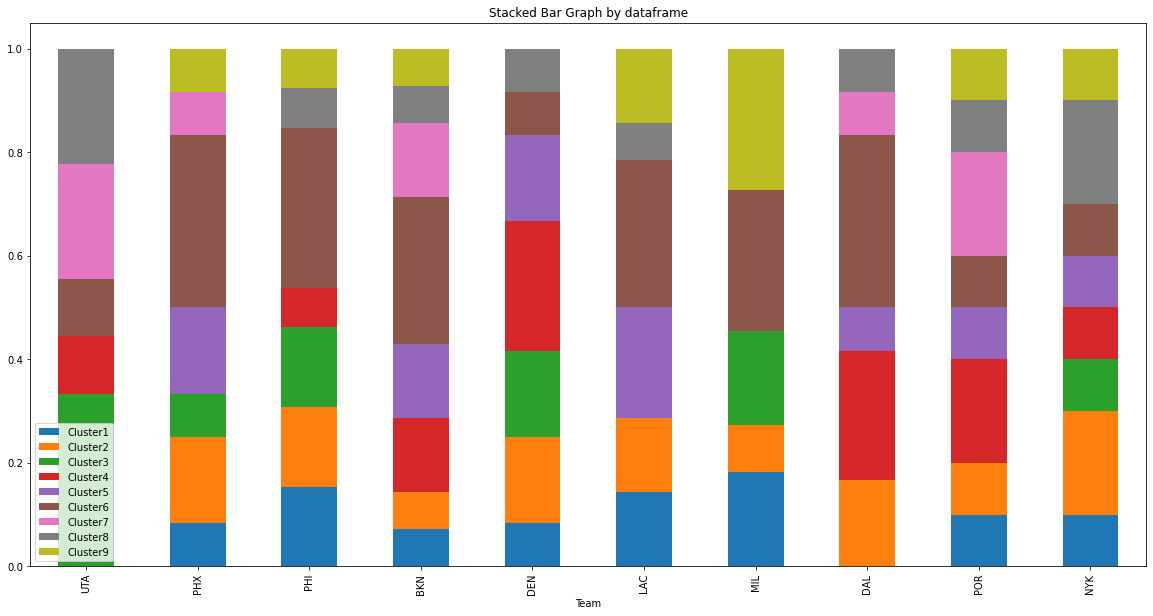

In [688]:
TeamComparison(teamComparisonTop10, True)

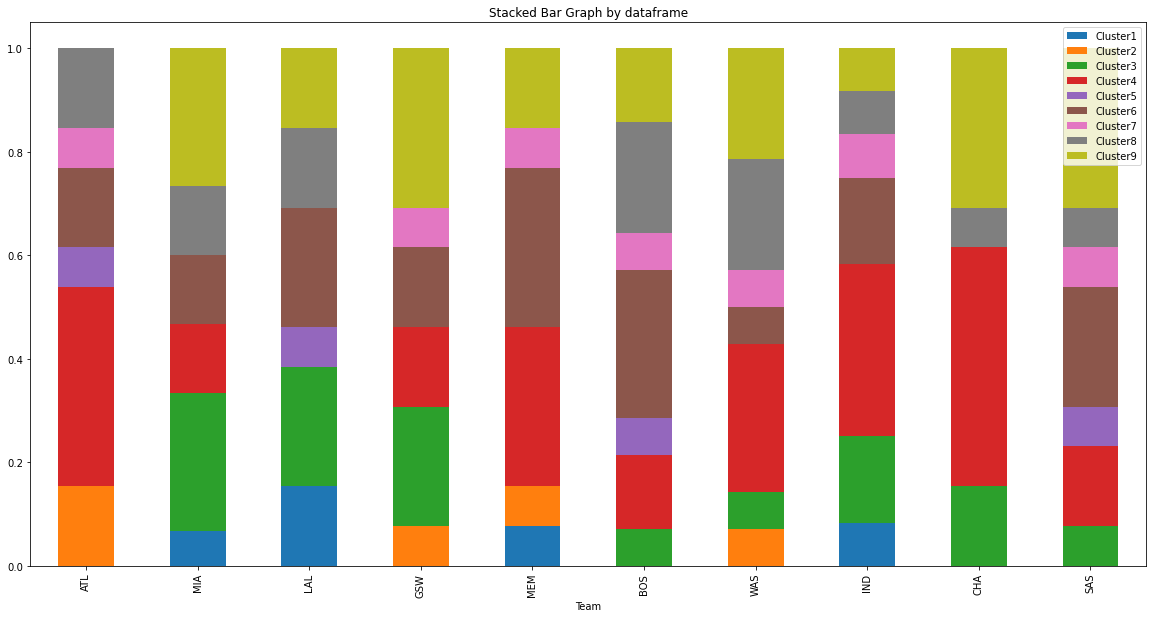

In [689]:
TeamComparison(teamComparisonMid10, True)

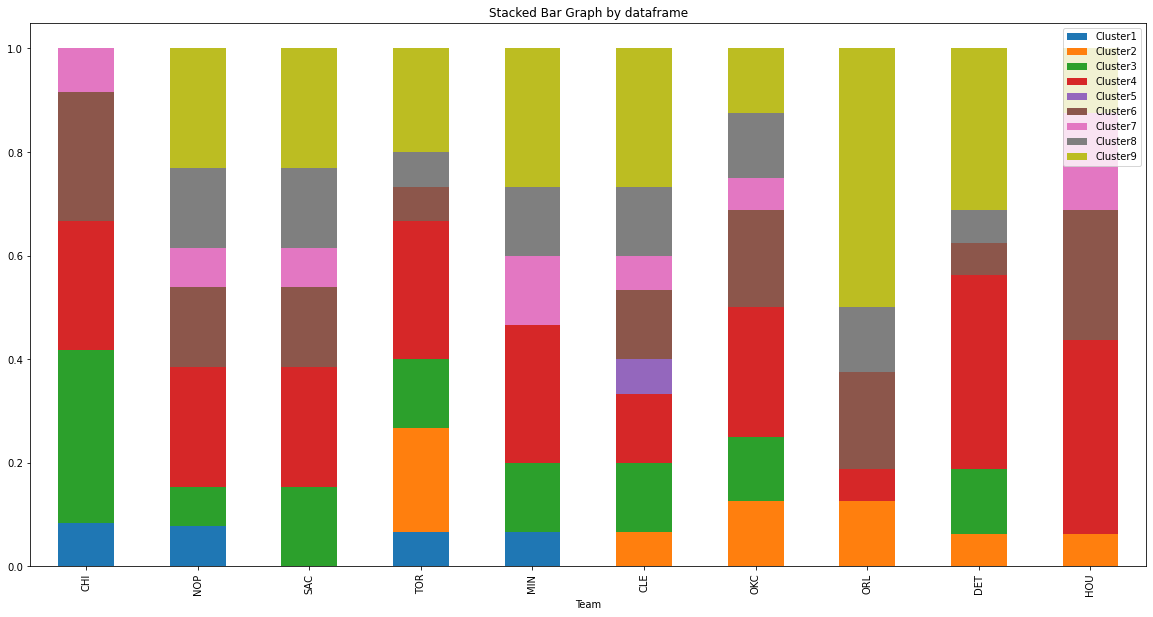

In [690]:
TeamComparison(teamComparisonBot10, True)

From our initial plots we do see some differences in team composition between the 3 tiers of teams. The lower 2 tiers seem to contain a lot more of cluster 9 and cluster 4 players compared to the top tier. And although rare in general, cluster 1 seems to appear a lot more in top tier teams. We combine the 3 tier datas to confirm our suspicion.

In [691]:
tierDf = pd.DataFrame()
tierDf["Tier"] = np.nan
tierDf["Cluster1"] = np.nan
tierDf["Cluster2"] = np.nan
tierDf["Cluster3"] = np.nan
tierDf["Cluster4"] = np.nan
tierDf["Cluster5"] = np.nan
tierDf["Cluster6"] = np.nan
tierDf["Cluster7"] = np.nan
tierDf["Cluster8"] = np.nan
tierDf["Cluster9"] = np.nan

tiers = [["Top10", teamComparison.iloc[0:10, 0:10]], ["Mid10", teamComparison.iloc[10:20, 0:10]], ["Bot10", teamComparison.iloc[20:30, 0:10]]]

for tier in tiers:

    clusArr = [tier[0]] + [0] * 9

    for index, row in tier[1].iterrows():
        i = 1
        while i < 10:
            clusArr[i] += row[i]
            i += 1
            
    tierDf.loc[index,tierDf.columns.to_list()] = clusArr

tierDf

,Tier,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9
9,Top10,11.0,15.0,11.0,13.0,12.0,27.0,8.0,10.0,10.0
19,Mid10,5.0,5.0,17.0,31.0,4.0,23.0,7.0,15.0,26.0
29,Bot10,4.0,10.0,17.0,36.0,1.0,21.0,10.0,14.0,34.0


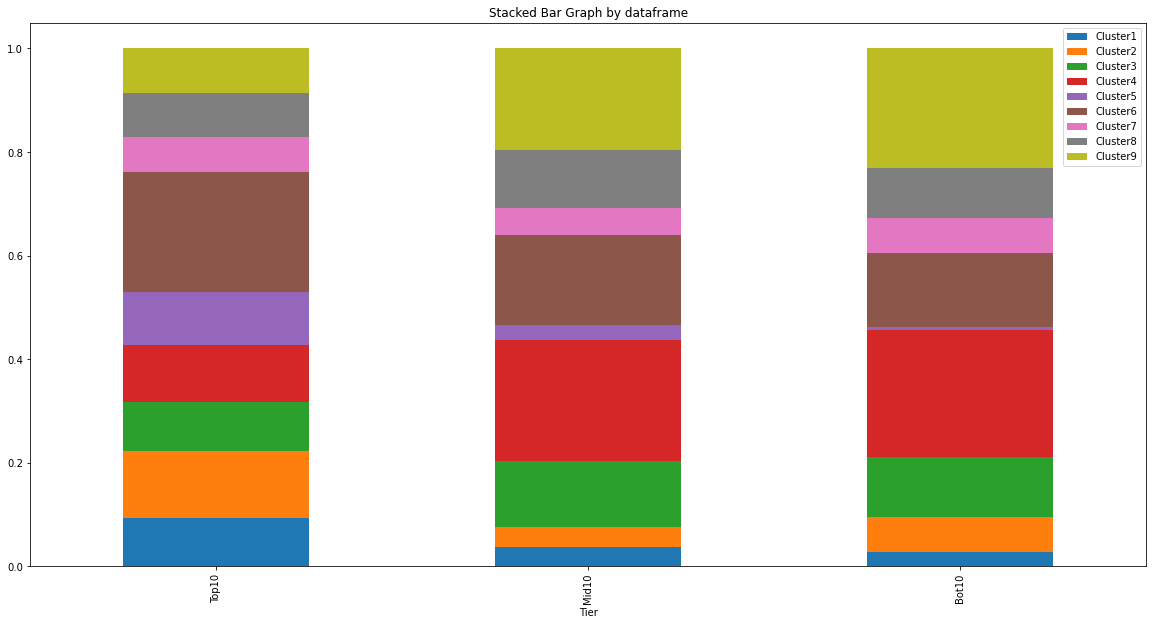

In [692]:
TeamComparison(tierDf, False)

- cluster 1: elite scoring players
- cluster 2: assist maker guards that operate around the pain
- cluster 3: offensive minded guards
- cluster 4: offensive minded forwards
- cluster 5: shooting big men
- cluster 6: effective shooters
- cluster 7: scoring shooters
- cluster 8: traditional big men

insight 1: no need defense. a good offense is the best defense
insight 2: 